# Cardiovascular Disease Detection 

# Problem Statement
The aim of this Jupyter Notebook is to detect the presence or absence of cardiovascular disease in individuals based on the provided features. The dataset contains various features related to an individual's age, height, weight, gender, blood pressure readings, cholesterol level, glucose level, smoking habits, alcohol intake, physical activity, and the presence or absence of cardiovascular disease.

##  Features Available
The dataset includes the following features:

- Age: Objective Feature, represented in days (int).
- Height: Objective Feature, represented in centimeters (int).
- Weight: Objective Feature, represented in kilograms (float).
- Gender: Objective Feature, represented as a categorical code.
- Systolic Blood Pressure (ap_hi): Examination Feature, represented as an integer.
- Diastolic Blood Pressure (ap_lo): Examination Feature, represented as an integer.
- Cholesterol: Examination Feature, with values 1: normal, 2: above normal, 3: well above normal.
- Glucose: Examination Feature, with values 1: normal, 2: above normal, 3: well above normal.
- Smoking: Subjective Feature, binary (0: non-smoker, 1: smoker).
- Alcohol Intake: Subjective Feature, binary (0: non-drinker, 1: drinker).
- Physical Activity: Subjective Feature, binary (0: inactive, 1: active).
- Presence or Absence of Cardiovascular Disease: Target Variable, binary (0: absence, 1: presence).

## The features are categorized as follows:

- Objective: Factual information, such as age, height, weight, and gender.
- Examination: Results of medical examination, including blood pressure, cholesterol, and glucose levels.
- Subjective: Information given by the patient, such as smoking habits, alcohol intake, and physical activity.

The dataset's objective is to leverage these features to build a predictive model that can accurately detect the presence or absence of cardiovascular disease in individuals.

Data Source:https://www.kaggle.com/sulianova/cardiovascular-disease-dataset

# IMPORT LIBRARIES AND DATASETS

In [25]:
# import the necessary libraries
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
%matplotlib inline

In [14]:
# read the csv file 
cardio_df = pd.read_csv("cardio_train.csv", sep=";")

In [15]:
cardio_df.head()

,id,age,gender,height,weight,ap_hi,ap_lo,cholesterol,gluc,smoke,alco,active,cardio
0,0,18393,2,168,62.0,110,80,1,1,0,0,1,0
1,1,20228,1,156,85.0,140,90,3,1,0,0,1,1
2,2,18857,1,165,64.0,130,70,3,1,0,0,0,1
3,3,17623,2,169,82.0,150,100,1,1,0,0,1,1
4,4,17474,1,156,56.0,100,60,1,1,0,0,0,0


# EDA

In [16]:
# drop id column, not much use
cardio_df = cardio_df.drop(columns = 'id')

In [17]:
# since the age is given in days, I convert it into years

cardio_df['age'] = cardio_df['age']/365

In [18]:
# first five rows of df
cardio_df.head()

,age,gender,height,weight,ap_hi,ap_lo,cholesterol,gluc,smoke,alco,active,cardio
0,50.391781,2,168,62.0,110,80,1,1,0,0,1,0
1,55.419178,1,156,85.0,140,90,3,1,0,0,1,1
2,51.663014,1,165,64.0,130,70,3,1,0,0,0,1
3,48.282192,2,169,82.0,150,100,1,1,0,0,1,1
4,47.873973,1,156,56.0,100,60,1,1,0,0,0,0


In [19]:
# checking the null values
cardio_df.isnull().sum()

age            0
gender         0
height         0
weight         0
ap_hi          0
ap_lo          0
cholesterol    0
gluc           0
smoke          0
alco           0
active         0
cardio         0
dtype: int64

In [20]:
# checking the dataframe information

cardio_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 70000 entries, 0 to 69999
Data columns (total 12 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   age          70000 non-null  float64
 1   gender       70000 non-null  int64  
 2   height       70000 non-null  int64  
 3   weight       70000 non-null  float64
 4   ap_hi        70000 non-null  int64  
 5   ap_lo        70000 non-null  int64  
 6   cholesterol  70000 non-null  int64  
 7   gluc         70000 non-null  int64  
 8   smoke        70000 non-null  int64  
 9   alco         70000 non-null  int64  
 10  active       70000 non-null  int64  
 11  cardio       70000 non-null  int64  
dtypes: float64(2), int64(10)
memory usage: 6.4 MB


In [21]:
# statistical summary of the dataframe
cardio_df.describe()

,age,gender,height,weight,ap_hi,ap_lo,cholesterol,gluc,smoke,alco,active,cardio
count,70000.000000,70000.000000,70000.000000,70000.000000,70000.000000,70000.000000,70000.000000,70000.000000,70000.000000,70000.000000,70000.000000,70000.000000
mean,53.339358,1.349571,164.359229,74.205690,128.817286,96.630414,1.366871,1.226457,0.088129,0.053771,0.803729,0.499700
std,6.759594,0.476838,8.210126,14.395757,154.011419,188.472530,0.680250,0.572270,0.283484,0.225568,0.397179,0.500003
min,29.583562,1.000000,55.000000,10.000000,-150.000000,-70.000000,1.000000,1.000000,0.000000,0.000000,0.000000,0.000000
25%,48.394521,1.000000,159.000000,65.000000,120.000000,80.000000,1.000000,1.000000,0.000000,0.000000,1.000000,0.000000
50%,53.980822,1.000000,165.000000,72.000000,120.000000,80.000000,1.000000,1.000000,0.000000,0.000000,1.000000,0.000000
75%,58.430137,2.000000,170.000000,82.000000,140.000000,90.000000,2.000000,1.000000,0.000000,0.000000,1.000000,1.000000
max,64.967123,2.000000,250.000000,200.000000,16020.000000,11000.000000,3.000000,3.000000,1.000000,1.000000,1.000000,1.000000


In [23]:
# seeing patients abobe 64.8 years old
cardio_df[cardio_df["age"] > 64.8]

,age,gender,height,weight,ap_hi,ap_lo,cholesterol,gluc,smoke,alco,active,cardio
395,64.824658,2,160,78.0,140,90,1,1,0,0,1,0
643,64.802740,1,154,79.0,130,80,1,1,0,0,1,0
2936,64.808219,2,156,60.0,140,90,1,1,0,0,1,1
4295,64.849315,1,169,75.0,120,80,1,1,0,0,1,0
9787,64.838356,2,165,70.0,120,80,1,1,0,0,0,0
10422,64.816438,2,177,102.0,130,80,1,2,0,0,1,0
16439,64.821918,1,160,65.0,130,80,3,3,0,0,0,1
18062,64.863014,1,140,48.0,170,100,2,1,0,0,1,1
20931,64.904110,1,165,63.0,150,90,2,1,0,0,1,1
22229,64.838356,2,170,91.0,130,90,1,1,0,0,1,0


**Observation:**

- Definitely see more 1s than 0s, could be linear relationship bw age and cardiovascular disease which makes sense

array([[<matplotlib.axes._subplots.AxesSubplot object at 0x7f2f9fa6d0d0>,
      dtype=object)

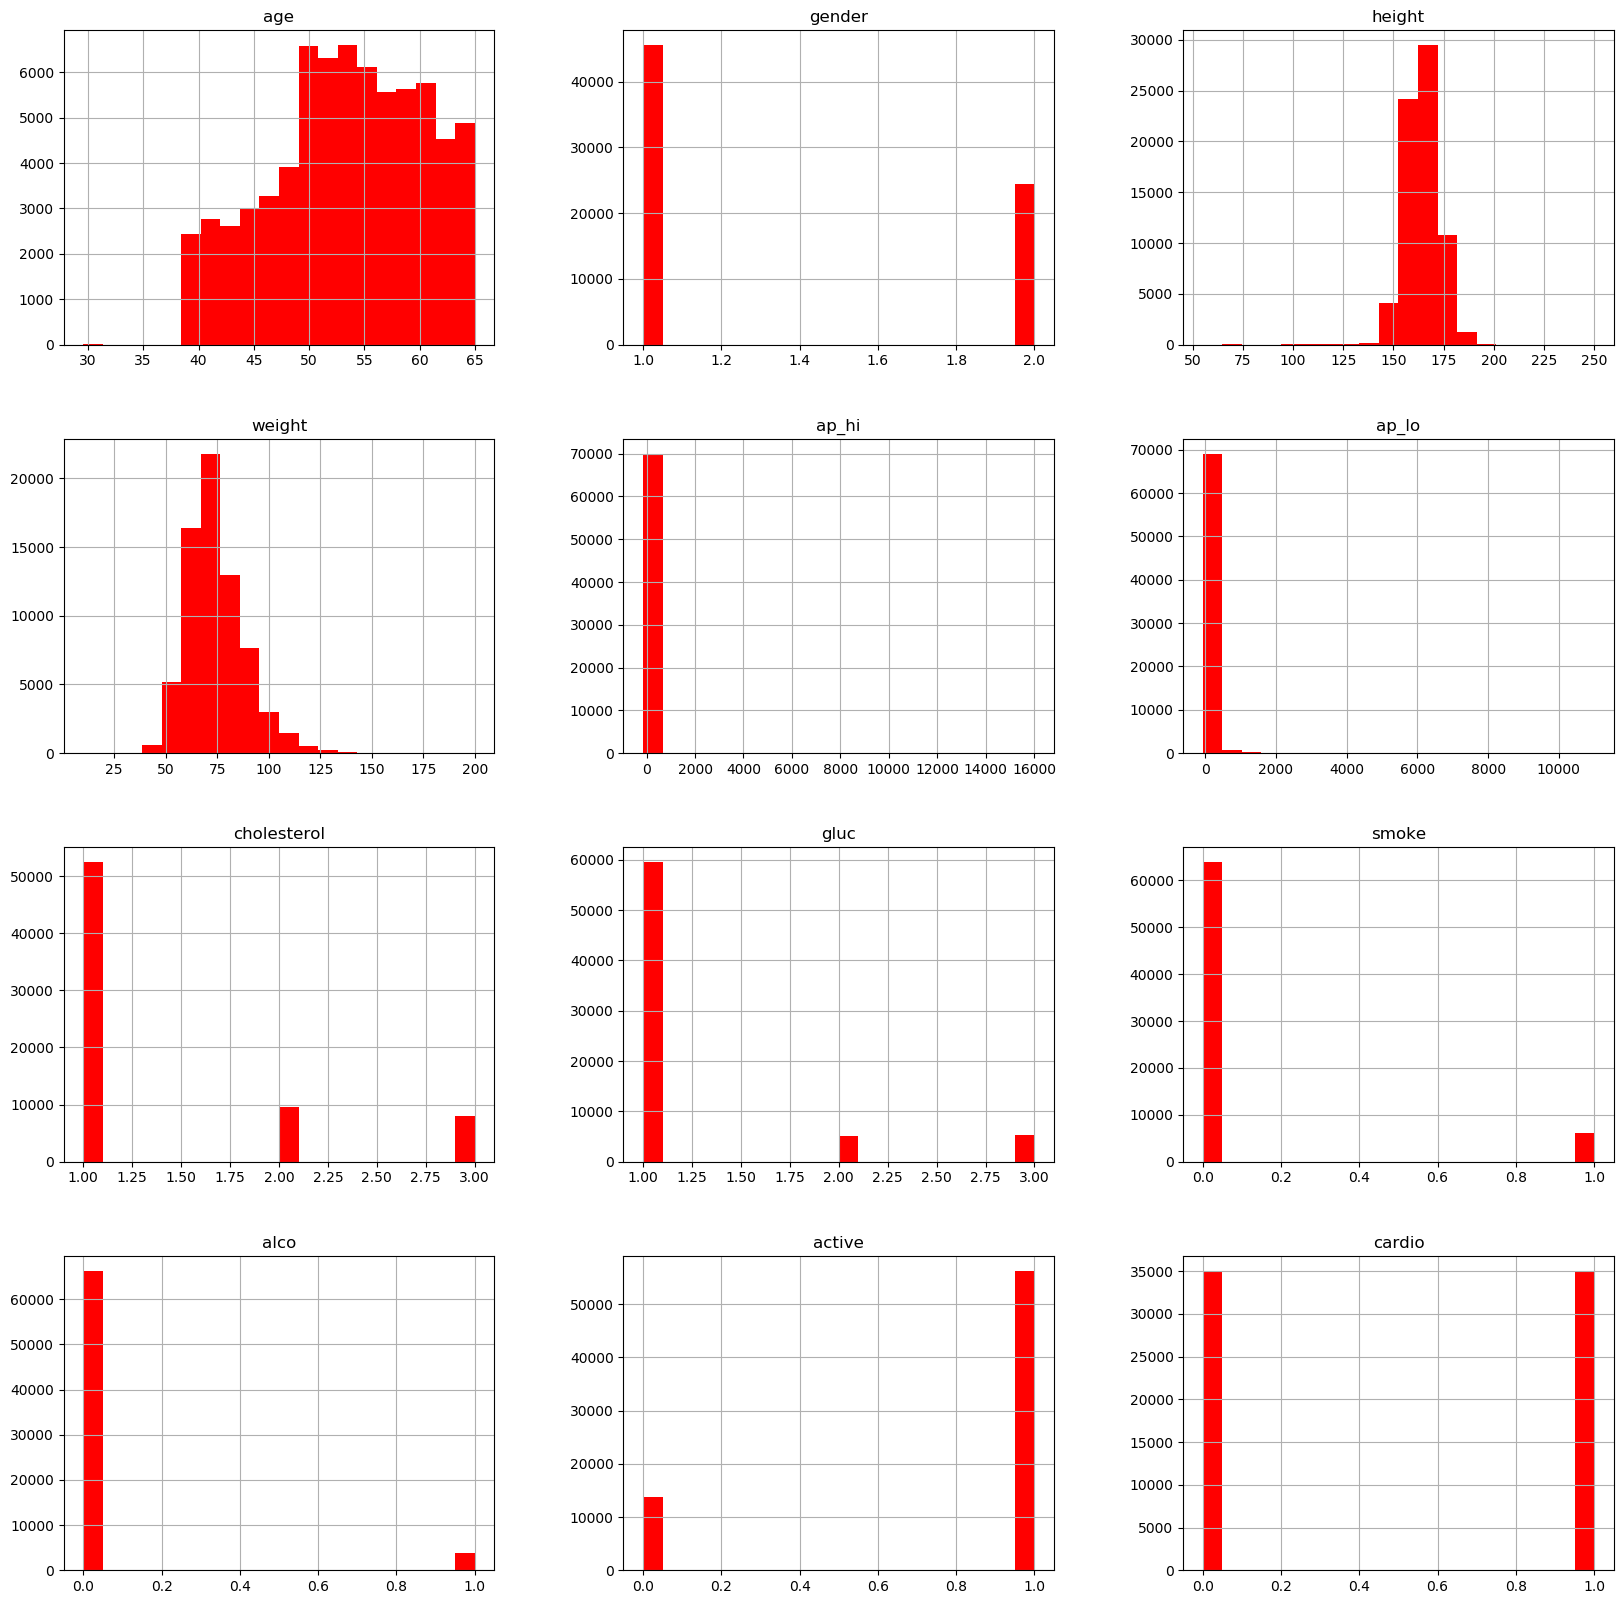

In [26]:
# histogram of features of df
cardio_df.hist(bins=20,figsize=(20,20),color="red")

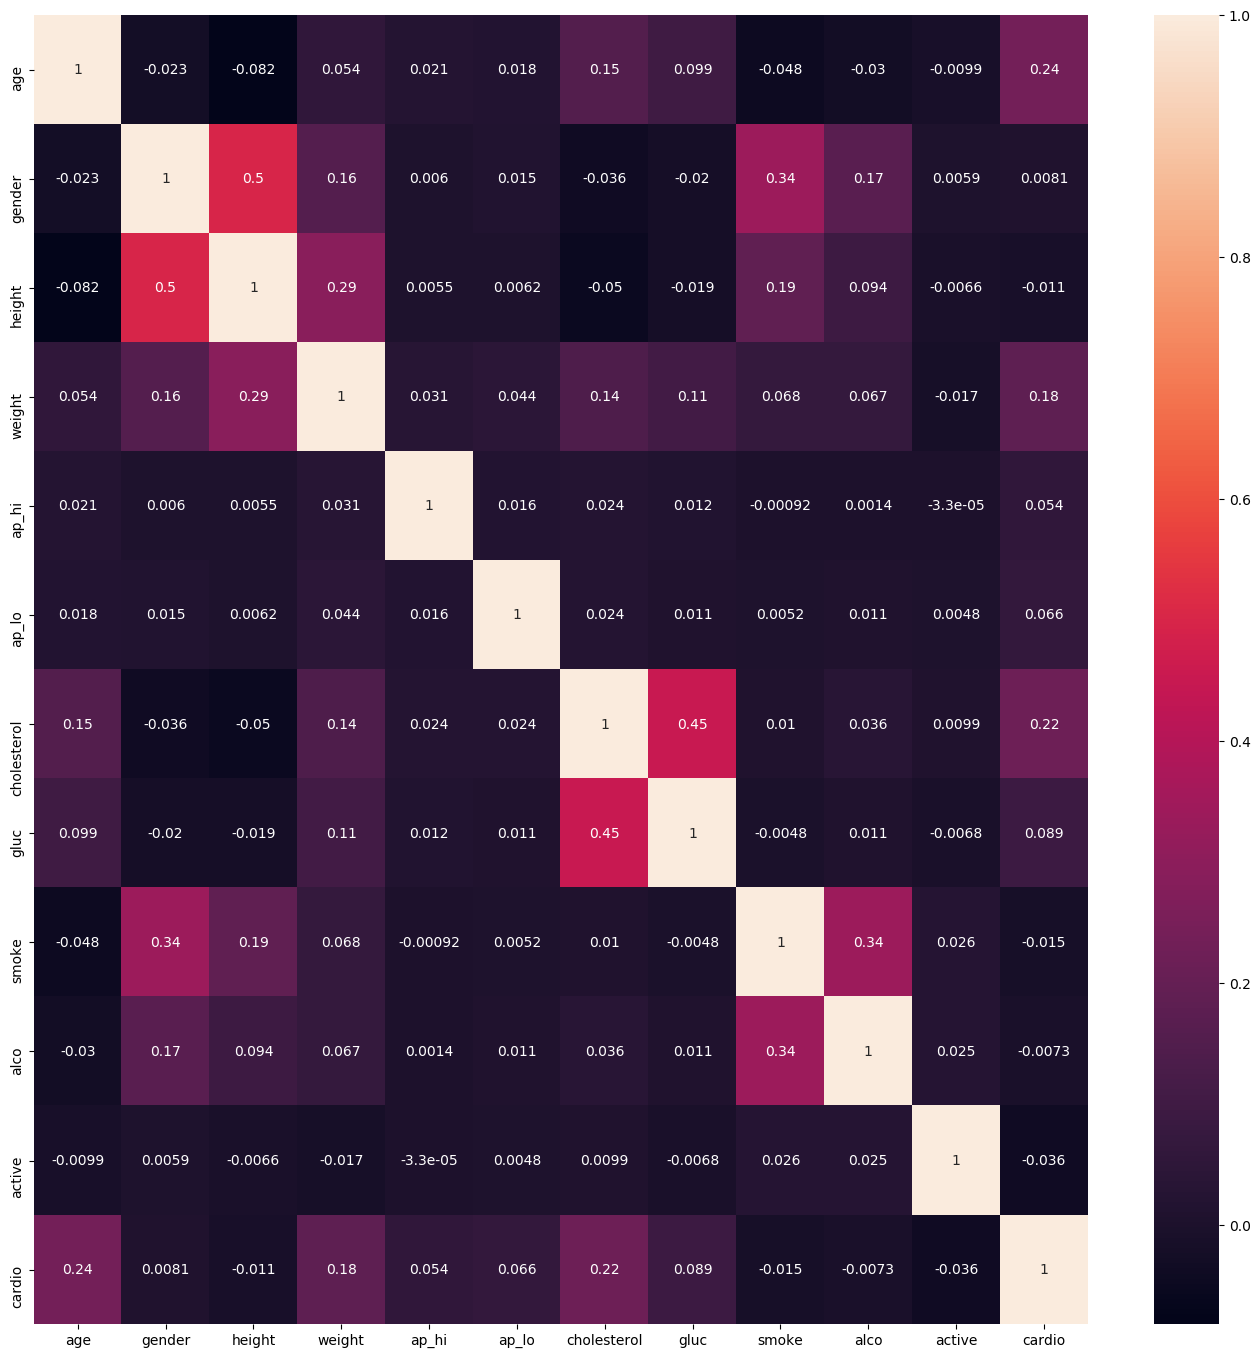

In [32]:
# plot correlation matrix
plt.figure(figsize=(17,17))
corr_matrix=cardio_df.corr()
sns.heatmap(corr_matrix,annot=True)

**Observation:**

- Age, weight, and cholesterol seem to be positively correlated to target
- Height and Gender have highest (positive) correlation of .45
- Cholesterol and Glucose have .45 correlation as well
- Overall, not too many positively or negatively correlated features above threshold

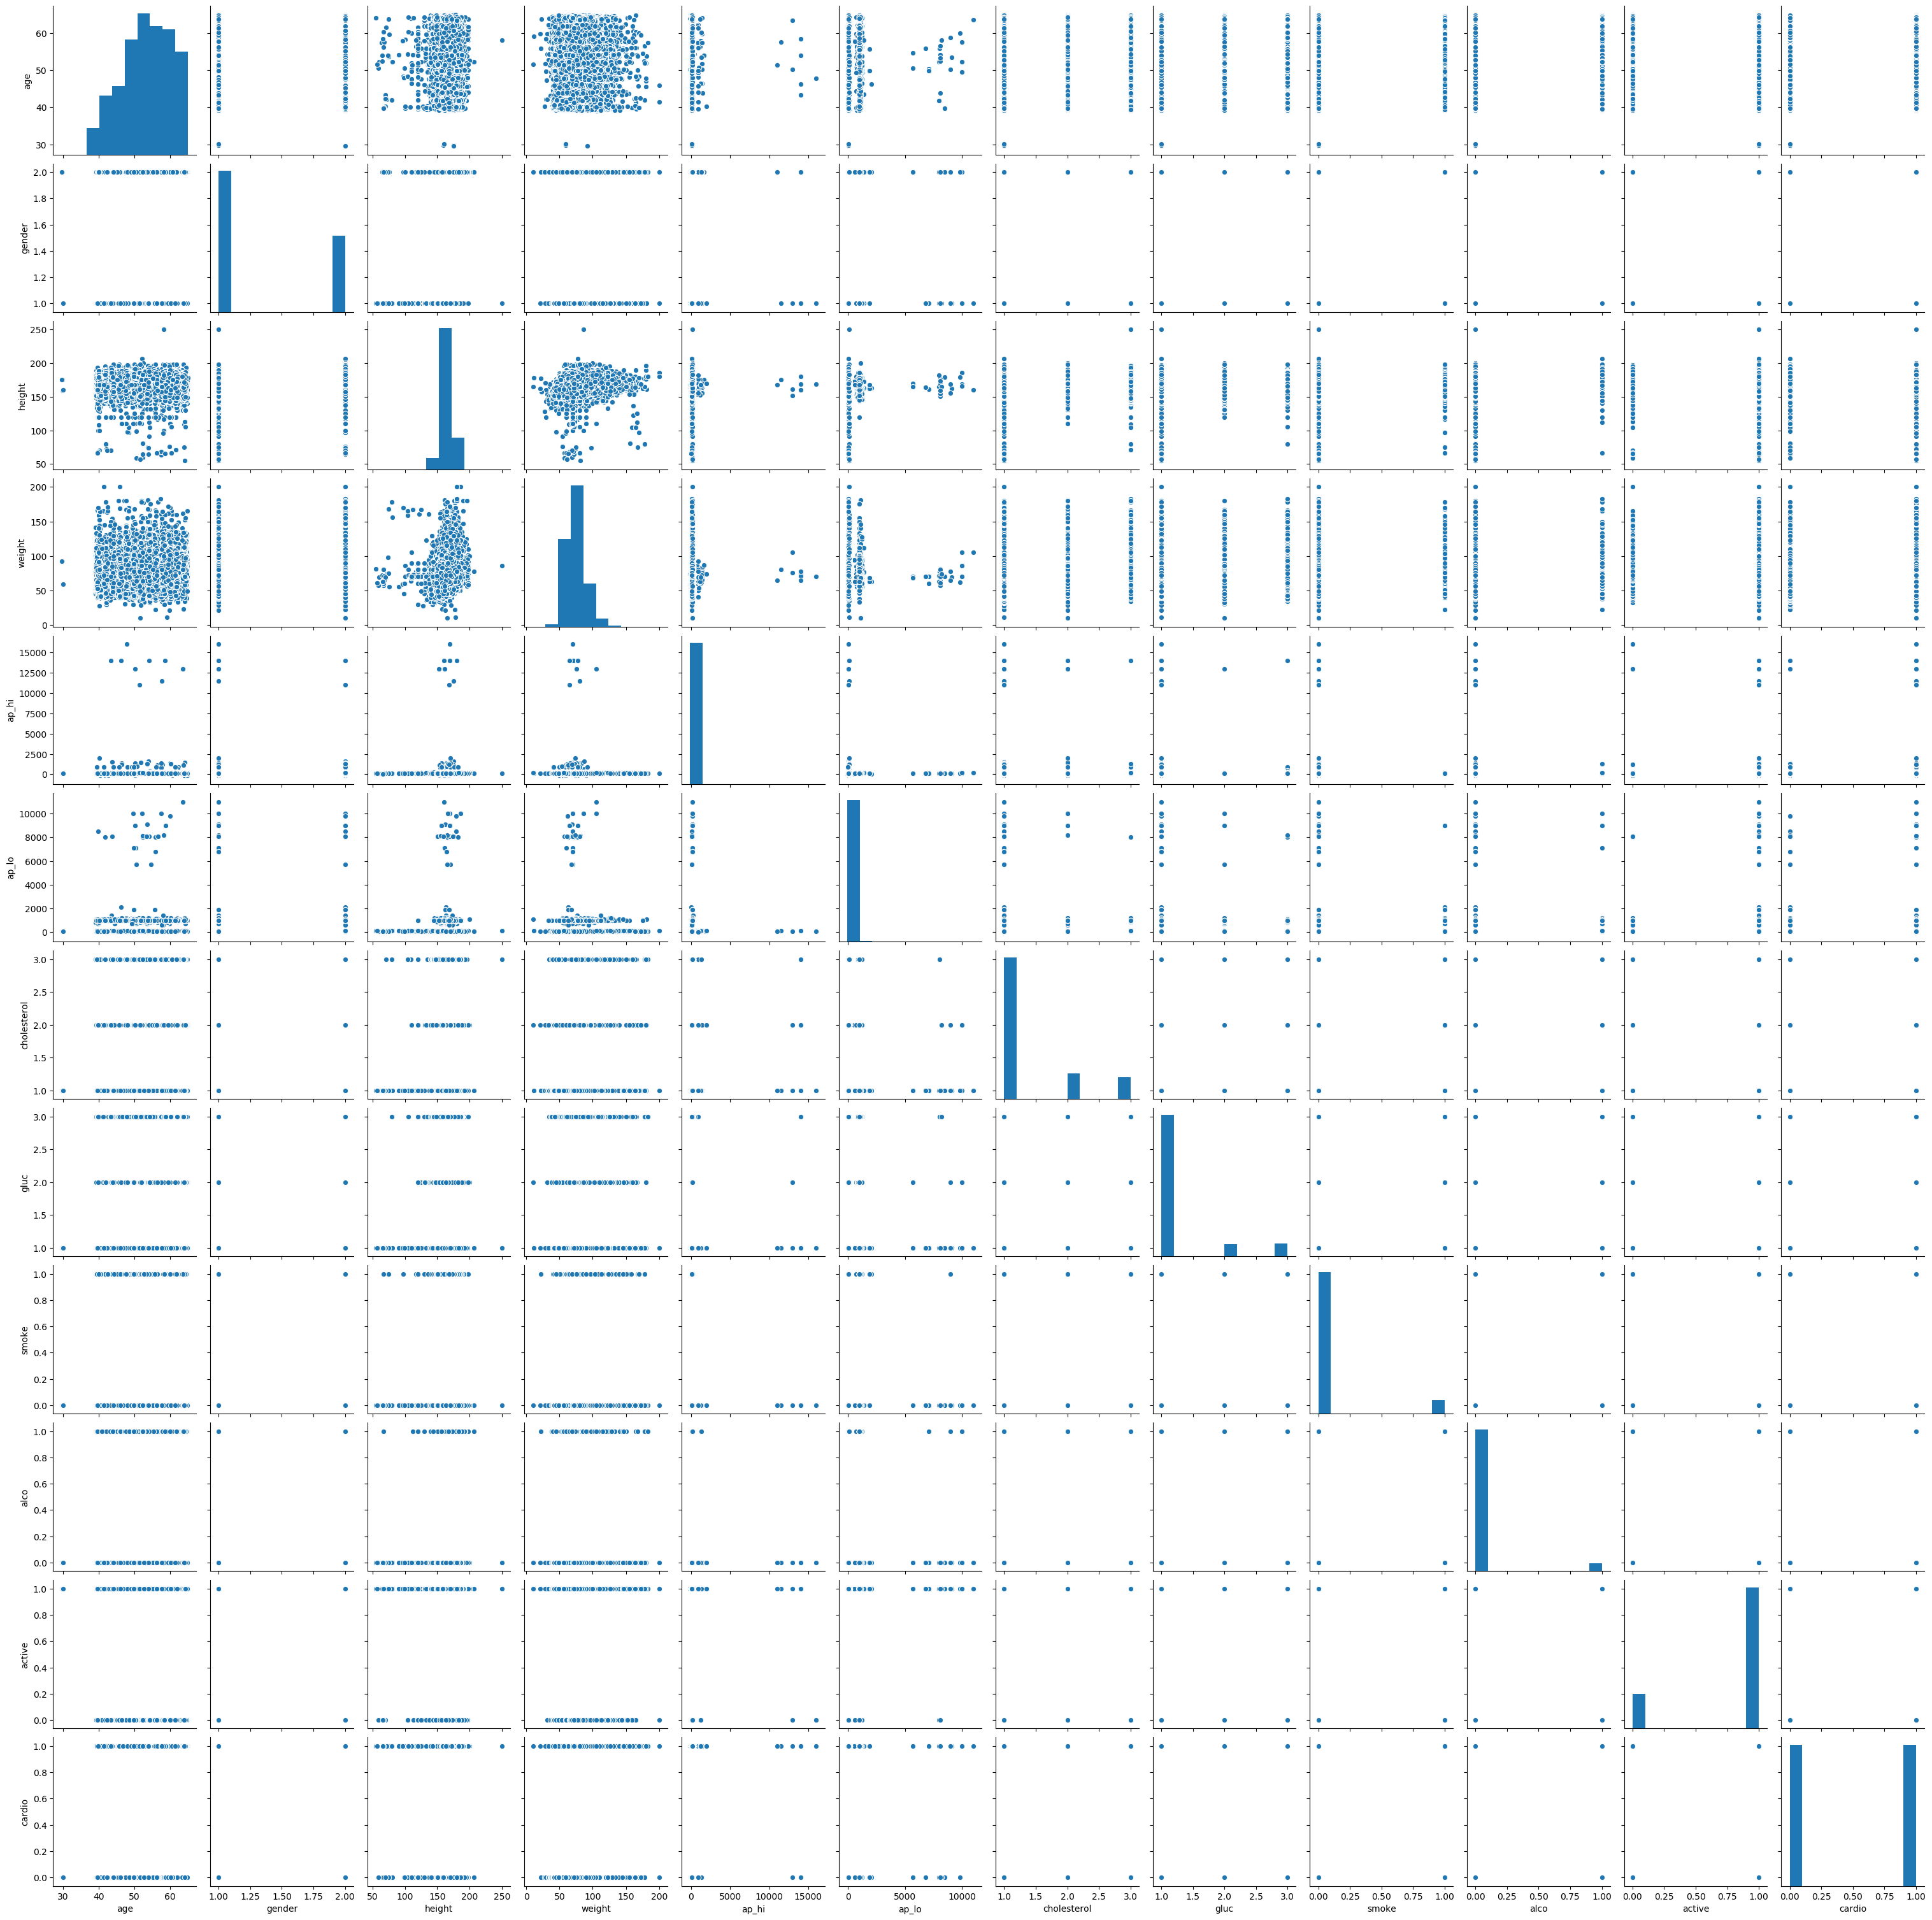

In [29]:
# pairplot of features
sns.pairplot(cardio_df)

# Model Building

In [33]:
# split the dataframe into target and features

df_target = cardio_df['cardio']
df_final = cardio_df.drop(columns =['cardio'])

In [34]:
cardio_df.columns

Index(['age', 'gender', 'height', 'weight', 'ap_hi', 'ap_lo', 'cholesterol',
       'gluc', 'smoke', 'alco', 'active', 'cardio'],
      dtype='object')

In [35]:
df_final.shape

(70000, 11)

In [36]:
df_target.shape

(70000,)

In [37]:
# spliting the data in to test and train sets
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(df_final, df_target, test_size = 0.2)



In [38]:
X_train.shape

(56000, 11)

In [39]:
y_train.shape

(56000,)

In [40]:
X_test.shape

(14000, 11)

In [41]:
X_test.shape

(14000, 11)

# TRAIN AND TEST XGBOOST MODEL IN LOCAL MODE (NOTE THAT SAGEMAKER BUILT-IN ALGORITHMS ARE NOT USED HERE)

In [42]:
# install xgboost

!pip install xgboost

  Using cached xgboost-1.6.2-py3-none-manylinux2014_x86_64.whl (255.9 MB)

[notice] A new release of pip is available: 23.1.2 -> 23.2.1
[notice] To update, run: pip install --upgrade pip


In [50]:
# use xgboost model in local mode

# note that we have not performed any normalization or scaling since XGBoost is not sensitive to this.
# XGboost is a type of ensemble algorithms and works by selecting thresholds or cut points on features to split a node. 
# it doesn't really matter if the features are scaled or not.


from xgboost import XGBClassifier

model = XGBClassifier(learning_rate=0.01,max_depth=20, n_estimators=500, objective='binary:logistic')


model.fit(X_train, y_train)

XGBClassifier(base_score=0.5, booster='gbtree', callbacks=None,
              colsample_bylevel=1, colsample_bynode=1, colsample_bytree=1,
              early_stopping_rounds=None, enable_categorical=False,
              eval_metric=None, gamma=0, gpu_id=-1, grow_policy='depthwise',
              importance_type=None, interaction_constraints='',
              learning_rate=0.01, max_bin=256, max_cat_to_onehot=4,
              max_delta_step=0, max_depth=20, max_leaves=0, min_child_weight=1,
              missing=nan, monotone_constraints='()', n_estimators=500,
              n_jobs=0, num_parallel_tree=1, objective='binary:logistic',
              predictor='auto', random_state=0, reg_alpha=0, ...)

In [51]:
# make predictions on test data

predict = model.predict(X_test)

In [52]:
predict

array([0, 1, 0, ..., 1, 0, 1])

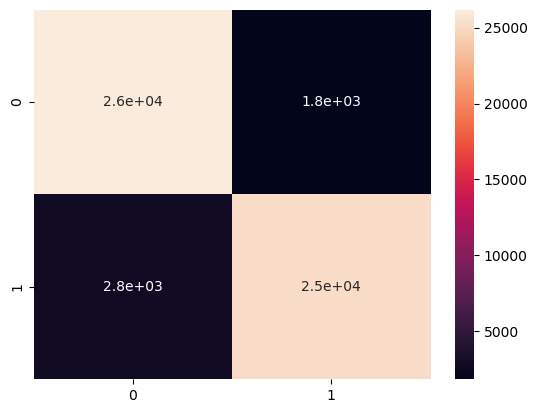

In [53]:
# assessing trained model performance on training dataset
predict_train = model.predict(X_train)
from sklearn.metrics import confusion_matrix
cm = confusion_matrix(y_train, predict_train)
plt.figure()
sns.heatmap(cm, annot=True)

**Observation:**

- While there are many TP's and TN's, there are many FP's and FN's as well which indicates model isn't classifying extremely well

In [54]:
# print metrics for training dataset

from sklearn.metrics import precision_score, recall_score, accuracy_score

print("Precision = {}".format(precision_score(y_train, predict_train)))
print("Recall = {}".format(recall_score(y_train, predict_train)))
print("Accuracy = {}".format(accuracy_score(y_train, predict_train)))

Precision = 0.9323433565397719
Recall = 0.8995640988995284
Accuracy = 0.9171785714285714


In [55]:
# print metrics for testing dataset

print("Precision = {}".format(precision_score(y_test, predict)))
print("Recall = {}".format(recall_score(y_test, predict)))
print("Accuracy = {}".format(accuracy_score(y_test, predict)))

Precision = 0.7346628101689755
Recall = 0.6903161207266485
Accuracy = 0.7208571428571429


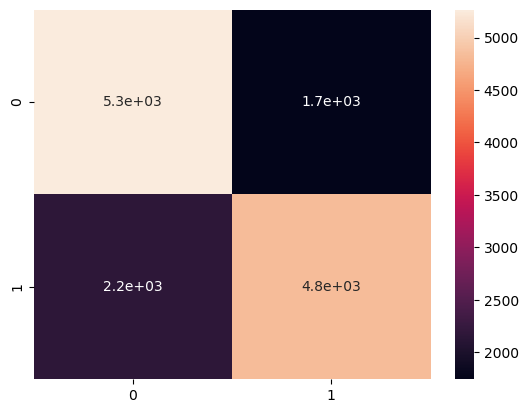

In [56]:
# plot the confusion matrix

from sklearn.metrics import confusion_matrix
cm = confusion_matrix(y_test, predict)
plt.figure()
sns.heatmap(cm, annot=True)

**Observation:**

- Same situation for test dataset

In [60]:
# setting up dictionairy of parameter values to search over 
param_grid = {
        'gamma': [0.5, 1, 5],   # regularization parameter 
        'subsample': [0.6, 0.8, 1.0], # % of rows taken to build each tree
        'colsample_bytree': [0.6, 0.8, 1.0], # number of columns used by each tree
        'max_depth': [3, 4, 5] # depth of each tree
        }

In [63]:
# conducting grid search to find best hyperparameters
from sklearn.model_selection import GridSearchCV
xgb_model = XGBClassifier(learning_rate=0.01,max_depth=8, n_estimators=100, objective='binary:logistic')
grid=GridSearchCV(xgb_model,param_grid,verbose=4)
grid.fit(X_train,y_train)

Fitting 5 folds for each of 81 candidates, totalling 405 fits
[CV] colsample_bytree=0.6, gamma=0.5, max_depth=3, subsample=0.6 .....


[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.


[CV]  colsample_bytree=0.6, gamma=0.5, max_depth=3, subsample=0.6, score=0.729, total=   2.4s
[CV] colsample_bytree=0.6, gamma=0.5, max_depth=3, subsample=0.6 .....


[Parallel(n_jobs=1)]: Done   1 out of   1 | elapsed:    2.4s remaining:    0.0s


[CV]  colsample_bytree=0.6, gamma=0.5, max_depth=3, subsample=0.6, score=0.731, total=   2.6s
[CV] colsample_bytree=0.6, gamma=0.5, max_depth=3, subsample=0.6 .....


[Parallel(n_jobs=1)]: Done   2 out of   2 | elapsed:    5.0s remaining:    0.0s


[CV]  colsample_bytree=0.6, gamma=0.5, max_depth=3, subsample=0.6, score=0.728, total=   2.3s
[CV] colsample_bytree=0.6, gamma=0.5, max_depth=3, subsample=0.6 .....


[Parallel(n_jobs=1)]: Done   3 out of   3 | elapsed:    7.3s remaining:    0.0s


[CV]  colsample_bytree=0.6, gamma=0.5, max_depth=3, subsample=0.6, score=0.730, total=   2.0s
[CV] colsample_bytree=0.6, gamma=0.5, max_depth=3, subsample=0.6 .....
[CV]  colsample_bytree=0.6, gamma=0.5, max_depth=3, subsample=0.6, score=0.729, total=   1.9s
[CV] colsample_bytree=0.6, gamma=0.5, max_depth=3, subsample=0.8 .....
[CV]  colsample_bytree=0.6, gamma=0.5, max_depth=3, subsample=0.8, score=0.729, total=   1.9s
[CV] colsample_bytree=0.6, gamma=0.5, max_depth=3, subsample=0.8 .....
[CV]  colsample_bytree=0.6, gamma=0.5, max_depth=3, subsample=0.8, score=0.732, total=   1.9s
[CV] colsample_bytree=0.6, gamma=0.5, max_depth=3, subsample=0.8 .....
[CV]  colsample_bytree=0.6, gamma=0.5, max_depth=3, subsample=0.8, score=0.728, total=   2.0s
[CV] colsample_bytree=0.6, gamma=0.5, max_depth=3, subsample=0.8 .....
[CV]  colsample_bytree=0.6, gamma=0.5, max_depth=3, subsample=0.8, score=0.730, total=   1.9s
[CV] colsample_bytree=0.6, gamma=0.5, max_depth=3, subsample=0.8 .....
[CV]  cols

[Parallel(n_jobs=1)]: Done 405 out of 405 | elapsed: 19.3min finished


GridSearchCV(cv=None, error_score=nan,
             estimator=XGBClassifier(base_score=None, booster=None,
                                     callbacks=None, colsample_bylevel=None,
                                     colsample_bynode=None,
                                     colsample_bytree=None,
                                     early_stopping_rounds=None,
                                     enable_categorical=False, eval_metric=None,
                                     gamma=None, gpu_id=None, grow_policy=None,
                                     importance_type=None,
                                     interaction_constraints=None,
                                     learning_rate=0.01,...
                                     n_estimators=100, n_jobs=None,
                                     num_parallel_tree=None,
                                     objective='binary:logistic',
                                     predictor=None, random_state=None,
                 

In [64]:
y_predict_optim = grid.predict(X_test)

In [65]:
y_predict_optim

array([0, 1, 0, ..., 1, 0, 1])

In [66]:
# print metrics for testing dataset

print("Precision = {}".format(precision_score(y_test, y_predict_optim)))
print("Recall = {}".format(recall_score(y_test, y_predict_optim)))
print("Accuracy = {}".format(accuracy_score(y_test, y_predict_optim)))

Precision = 0.7720334810438207
Recall = 0.6728651122872265
Accuracy = 0.7374285714285714


**Observation:**

- Scores increased slighly from previous model with random hyperparameters

# DIMENSIONALITY REDUCTION USING PCA ( USING SAGEMAKER)

In [67]:
# Boto3 is the Amazon Web Services (AWS) Software Development Kit (SDK) for Python
# Boto3 allows Python developer to write software that makes use of services like Amazon S3 and Amazon EC2



import sagemaker
import boto3
from sagemaker import Session

# Let's create a Sagemaker session
sagemaker_session = sagemaker.Session()
bucket = "cardio-pca-efth"
prefix = 'pca'  # prefix is the subfolder within the bucket.

#Let's get the execution role for the notebook instance. 
# This is the IAM role that you created when you created your notebook instance. You pass the role to the training job.
# Note that AWS Identity and Access Management (IAM) role that Amazon SageMaker can assume to perform tasks on your behalf (for example, reading training results, called model artifacts, from the S3 bucket and writing training results to Amazon S3). 

role = sagemaker.get_execution_role()

In [68]:
# The io module allows for dealing with various types of I/O (text I/O, binary I/O and raw I/O). 
import io 
import numpy as np
# sagemaker common libary
import sagemaker.amazon.common as smac 

# Code below converts the data in numpy array format to RecordIO format
# This is the format required by Sagemaker PCA

buf = io.BytesIO() # create an in-memory byte array (buf is a buffer I will be writing to)
df_matrix = df_final.to_numpy() # convert the dataframe into 2-dimensional array
smac.write_numpy_to_dense_tensor(buf, df_matrix)
buf.seek(0)



0

In [69]:
import os

# Code to upload RecordIO data to S3
 
# Key refers to the name of the file 
 
key = 'pca'

# following code uploads the data in record-io format to S3 bucket to be accessed later for training
boto3.resource('s3').Bucket(bucket).Object(os.path.join(prefix, 'train', key)).upload_fileobj(buf)

# let's print out the training data location in s3
s3_train_data = 's3://{}/{}/train/{}'.format(bucket, prefix, key)


print('uploaded training data location: {}'.format(s3_train_data))

uploaded training data location: s3://cardio-pca-efth/pca/train/pca


In [70]:
# create output placeholder in S3 bucket to store the PCA output

output_location = 's3://{}/{}/output'.format(bucket, prefix)
print('training artifacts will be uploaded to: {}'.format(output_location))

training artifacts will be uploaded to: s3://cardio-pca-efth/pca/output


In [71]:
# This code is used to get the training container of sagemaker built-in algorithms
# all we have to do is to specify the name of the algorithm, that we want to use

# Let's obtain a reference to the pca container image
# Note that all  models are named estimators
# You don't have to specify (hardcode) the region, get_image_uri will get the current region name using boto3.Session


from sagemaker.amazon.amazon_estimator import get_image_uri


container = get_image_uri(boto3.Session().region_name, 'pca')

The method get_image_uri has been renamed in sagemaker>=2.
See: https://sagemaker.readthedocs.io/en/stable/v2.html for details.


In [72]:
# We have pass in the container, the type of instance that we would like to use for training 
# output path and sagemaker session into the Estimator. 
# We can also specify how many instances we would like to use for training


pca = sagemaker.estimator.Estimator(container,
                                       role, 
                                       train_instance_count=1, 
                                       train_instance_type='ml.c4.xlarge',
                                       output_path=output_location,
                                       sagemaker_session=sagemaker_session)

# We can tune parameters like the number of features that we are passing in, mode of algorithm, mini batch size and number of pca components


pca.set_hyperparameters(feature_dim=11,
                        num_components=6,
                        subtract_mean=False,
                        algorithm_mode='regular',
                        mini_batch_size=100)


# Pass in the training data from S3 to train the pca model


pca.fit({'train': s3_train_data})

# Let's see the progress using cloudwatch logs

train_instance_count has been renamed in sagemaker>=2.
See: https://sagemaker.readthedocs.io/en/stable/v2.html for details.
train_instance_type has been renamed in sagemaker>=2.
See: https://sagemaker.readthedocs.io/en/stable/v2.html for details.
INFO:sagemaker:Creating training-job with name: pca-2023-07-31-18-42-56-162


2023-07-31 18:42:56 Starting - Starting the training job...
2023-07-31 18:43:21 Starting - Preparing the instances for training.........
2023-07-31 18:44:32 Downloading - Downloading input data......
2023-07-31 18:45:57 Training - Downloading the training image...
2023-07-31 18:46:13 Training - Training image download completed. Training in progress.Docker entrypoint called with argument(s): train
Running default environment configuration script
[07/31/2023 18:46:23 INFO 140254222522176] Reading default configuration from /opt/amazon/lib/python3.7/site-packages/algorithm/resources/default-conf.json: {'algorithm_mode': 'regular', 'subtract_mean': 'true', 'extra_components': '-1', 'force_dense': 'true', 'epochs': 1, '_log_level': 'info', '_kvstore': 'dist_sync', '_num_kv_servers': 'auto', '_num_gpus': 'auto'}
[07/31/2023 18:46:23 INFO 140254222522176] Merging with provided configuration from /opt/ml/input/config/hyperparameters.json: {'algorithm_mode': 'regular', 'feature_dim': '11', 'mi

# DEPLOY THE TRAINED PCA MODEL 

In [74]:
# Deploy the model to perform inference 
from sagemaker.deserializers import JSONDeserializer
from sagemaker.serializers import CSVSerializer

pca_reduction = pca.deploy(initial_instance_count = 1,
                                          instance_type = 'ml.m4.xlarge',
                          serializer=CSVSerializer(),
                          deserializer=JSONDeserializer())

INFO:sagemaker:Creating model with name: pca-2023-07-31-18-51-52-249
INFO:sagemaker:Creating endpoint-config with name pca-2023-07-31-18-51-52-249
INFO:sagemaker:Creating endpoint with name pca-2023-07-31-18-51-52-249


--------!

In [75]:
# make prediction on the test data

result = pca_reduction.predict(np.array(df_final))

In [76]:
result # results are in Json format

{'projections': [{'projection': [-0.2891036570072174,
    3.9943747520446777,
    -12.549570083618164,
    64.24058532714844,
    36.82109451293945,
    -217.8480682373047]},
  {'projection': [1.0957019329071045,
    -4.777677059173584,
    12.364439010620117,
    44.58211135864258,
    45.66633987426758,
    -241.0251007080078]},
  {'projection': [1.336683988571167,
    1.7997606992721558,
    -9.735824584960938,
    53.424842834472656,
    55.75396728515625,
    -223.01675415039062]},
  {'projection': [-0.4163884222507477,
    6.149697303771973,
    5.682126998901367,
    43.042396545410156,
    45.00962448120117,
    -257.2431640625]},
  {'projection': [-0.14980435371398926,
    2.6750032901763916,
    -13.209842681884766,
    63.61091995239258,
    44.3466911315918,
    -192.79931640625]},
  {'projection': [0.8930057883262634,
    -10.548048973083496,
    -2.894824981689453,
    50.40694808959961,
    40.3013801574707,
    -217.75537109375]},
  {'projection': [0.9225766658782959,
 

In [115]:
# since the results are in Json format, we access the scores by iterating through the scores in the predictions
predictions = np.array([r['projection'] for r in result['projections']])

In [116]:
predictions

array([[-2.89103657e-01,  3.99437475e+00, -1.25495701e+01,
         6.42405853e+01,  3.68210945e+01, -2.17848068e+02],
       [ 1.09570193e+00, -4.77767706e+00,  1.23644390e+01,
         4.45821114e+01,  4.56663399e+01, -2.41025101e+02],
       [ 1.33668399e+00,  1.79976070e+00, -9.73582458e+00,
         5.34248428e+01,  5.57539673e+01, -2.23016754e+02],
       ...,
       [ 9.36102509e-01,  6.50153160e+00,  2.10844498e+01,
         4.50918350e+01,  7.45691071e+01, -2.82263916e+02],
       [ 1.15454197e-03, -8.17430115e+00, -2.97180176e+00,
         5.16770020e+01,  5.14335823e+01, -2.34024872e+02],
       [ 3.68915290e-01, -1.09633231e+00, -4.88934517e+00,
         6.41318741e+01,  4.39791260e+01, -2.28002136e+02]])

In [79]:
predictions.shape

(70000, 6)

In [80]:
# delete the end-point

pca_reduction.delete_endpoint()

INFO:sagemaker:Deleting endpoint configuration with name: pca-2023-07-31-18-51-52-249
INFO:sagemaker:Deleting endpoint with name: pca-2023-07-31-18-51-52-249


# TRAIN AND EVALUATE XGBOOST MODEL ON DATA AFTER DIMENSIONALITY REDUCTION (USING SAGEMAKER)

In [81]:
predictions.shape

(70000, 6)

In [82]:
# Convert the array into dataframe in a way that target variable is set as the first column and is followed by feature columns
# This is because sagemaker built-in algorithm expects the data in this format

train_data = pd.DataFrame({'Target':df_target})
train_data

,Target
0,0
1,1
2,1
3,1
4,0
...,...
69995,0
69996,1
69997,1
69998,1


In [83]:
# putting data in format suitable for SageMaker algorithm
for i in range(predictions.shape[1]):
    train_data[i] = predictions[:,i]

In [84]:
train_data.head()

,Target,0,1,2,3,4,5
0,0,-0.289104,3.994375,-12.549570,64.240585,36.821095,-217.848068
1,1,1.095702,-4.777677,12.364439,44.582111,45.666340,-241.025101
2,1,1.336684,1.799761,-9.735825,53.424843,55.753967,-223.016754
3,1,-0.416388,6.149697,5.682127,43.042397,45.009624,-257.243164
4,0,-0.149804,2.675003,-13.209843,63.610920,44.346691,-192.799316


In [85]:
# spliting data for train set
train_data_size = int(0.9 * train_data.shape[0])
train_data_size

63000

In [86]:
# shuffle the data in dataframe and then split the dataframe into train, test and validation sets.

import sklearn 

train_data = sklearn.utils.shuffle(train_data)
train, test, valid = train_data[:train_data_size], train_data[train_data_size:train_data_size + 3500], train_data[train_data_size + 3500:]


In [87]:
train.shape, test.shape,valid.shape

((63000, 7), (3500, 7), (3500, 7))

In [88]:
X_test, y_test = test.drop(columns = ['Target']), test['Target']

In [89]:
# save train_data and validation_data as csv files

train.to_csv('train.csv',header = False, index = False)
valid.to_csv('valid.csv',header = False, index = False)

In [90]:
prefix = 'XGBoost-Classifier'
key = 'XGBoost-Classifier'

In [91]:
# read the data from csv file and then upload the data to s3 bucket
with open('train.csv','rb') as f:
    # the following code uploads the data into S3 bucket to be accessed later for training
    boto3.Session().resource('s3').Bucket(bucket).Object(os.path.join(prefix, 'train', key)).upload_fileobj(f)

# let's print out the training data location in s3
s3_train_data = 's3://{}/{}/train/{}'.format(bucket, prefix, key)
print('uploaded training data location: {}'.format(s3_train_data))

uploaded training data location: s3://cardio-pca-efth/XGBoost-Classifier/train/XGBoost-Classifier


In [92]:
# reading the data from csv file and then upload the data to s3 bucket
with open('valid.csv','rb') as f:
    # the following code uploads the data into S3 bucket to be accessed later for training
    boto3.Session().resource('s3').Bucket(bucket).Object(os.path.join(prefix, 'valid', key)).upload_fileobj(f)

# let's print out the validation data location in s3
s3_valid_data = 's3://{}/{}/valid/{}'.format(bucket, prefix, key)
print('uploaded validation data location: {}'.format(s3_valid_data))

uploaded validation data location: s3://cardio-pca-efth/XGBoost-Classifier/valid/XGBoost-Classifier


In [93]:
# creates output placeholder in S3 bucket to store the linear learner output

output_location = 's3://{}/{}/output'.format(bucket, prefix)
print('training artifacts will be uploaded to: {}'.format(output_location))

training artifacts will be uploaded to: s3://cardio-pca-efth/XGBoost-Classifier/output


In [94]:
# This code is used to get the training container of sagemaker built-in algorithms
# all we have to do is to specify the name of the algorithm, that we want to use

# Let's obtain a reference to the XGBoost container image
# Note that all  models are named estimators
# You don't have to specify (hardcode) the region, get_image_uri will get the current region name using boto3.Session


container = get_image_uri(boto3.Session().region_name, 'xgboost','0.90-2')

See: https://sagemaker.readthedocs.io/en/stable/v2.html for details.
INFO:sagemaker.image_uris:Defaulting to only available Python version: py3
INFO:sagemaker.image_uris:Defaulting to only supported image scope: cpu.


In [119]:
# We have pass in the container, the type of instance that we would like to use for training 
# output path and sagemaker session into the Estimator. 
# We can also specify how many instances we would like to use for training


Xgboost_classifier = sagemaker.estimator.Estimator(container,
                                       role, 
                                       train_instance_count=1, 
                                       train_instance_type='ml.m4.xlarge',
                                       output_path=output_location,
                                       sagemaker_session=sagemaker_session)

# To improve the performance of the model, a hyperparameters tuning job need to be run 

Xgboost_classifier.set_hyperparameters(max_depth=3,
                           objective='multi:softmax',
                           num_class= 2,
                           eta = 0.5,
                           num_round = 150
                           )

See: https://sagemaker.readthedocs.io/en/stable/v2.html for details.
See: https://sagemaker.readthedocs.io/en/stable/v2.html for details.


In [120]:
# Create "train", "validation" channels to feed in the model
# Source: https://docs.aws.amazon.com/sagemaker/latest/dg/sagemaker-algo-docker-registry-paths.html


train_input = sagemaker.session.s3_input(s3_data = s3_train_data, content_type='csv',s3_data_type = 'S3Prefix')
valid_input = sagemaker.session.s3_input(s3_data = s3_valid_data, content_type='csv',s3_data_type = 'S3Prefix')

Xgboost_classifier.fit({'train': train_input, 'validation': valid_input})

See: https://sagemaker.readthedocs.io/en/stable/v2.html for details.
See: https://sagemaker.readthedocs.io/en/stable/v2.html for details.
INFO:sagemaker:Creating training-job with name: sagemaker-xgboost-2023-07-31-19-31-34-014


2023-07-31 19:31:34 Starting - Starting the training job...
2023-07-31 19:32:01 Starting - Preparing the instances for training.........
2023-07-31 19:33:15 Downloading - Downloading input data...
2023-07-31 19:33:45 Training - Downloading the training image...
2023-07-31 19:34:21 Training - Training image download completed. Training in progress..INFO:sagemaker-containers:Imported framework sagemaker_xgboost_container.training
INFO:sagemaker-containers:Failed to parse hyperparameter objective value multi:softmax to Json.
Returning the value itself
INFO:sagemaker-containers:No GPUs detected (normal if no gpus installed)
INFO:sagemaker_xgboost_container.training:Running XGBoost Sagemaker in algorithm mode
INFO:root:Determined delimiter of CSV input is ','
INFO:root:Determined delimiter of CSV input is ','
INFO:root:Determined delimiter of CSV input is ','
[19:34:37] 63000x6 matrix with 378000 entries loaded from /opt/ml/input/data/train?format=csv&label_column=0&delimiter=,
INFO:root:De

# DEPLOY AND TEST THE TRAINED XGBOOST MODEL 

In [ ]:
# deploy the model to perfrom inference 

Xgboost_classifier = Xgboost_classifier.deploy(initial_instance_count = 1,
                                        instance_type = 'ml.m4.xlarge',
                                        serializer=CSVSerializer())

In [101]:
# Content type over-rides the data that will be passed to the deployed model, since the deployed model expects data in text/csv format, we specify this as content -type.
# Serializer accepts a single argument, the input data, and returns a sequence of bytes in the specified content type
#Reference: https://sagemaker.readthedocs.io/en/stable/predictors.html
#from sagemaker.predictor import csv_serializer, json_deserializer
#Xgboost_classifier.serializer = csv_serializer


In [122]:
# make prediction

XGB_prediction = Xgboost_classifier.predict(np.array(X_test))

In [123]:
XGB_prediction

b'0.0,0.0,1.0,0.0,1.0,1.0,1.0,0.0,1.0,1.0,0.0,0.0,0.0,0.0,1.0,1.0,0.0,1.0,0.0,1.0,1.0,1.0,0.0,0.0,0.0,0.0,1.0,1.0,0.0,1.0,1.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,1.0,0.0,1.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,1.0,1.0,0.0,0.0,1.0,0.0,0.0,0.0,1.0,1.0,0.0,0.0,0.0,1.0,0.0,0.0,1.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,1.0,0.0,0.0,1.0,0.0,0.0,1.0,0.0,1.0,1.0,0.0,1.0,0.0,1.0,0.0,1.0,0.0,0.0,1.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,1.0,0.0,1.0,1.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,1.0,0.0,1.0,1.0,1.0,0.0,0.0,1.0,1.0,1.0,1.0,0.0,1.0,0.0,1.0,0.0,0.0,1.0,1.0,0.0,0.0,0.0,1.0,0.0,0.0,1.0,0.0,0.0,0.0,1.0,1.0,1.0,1.0,0.0,1.0,1.0,0.0,0.0,1.0,1.0,0.0,1.0,0.0,1.0,0.0,0.0,0.0,1.0,1.0,1.0,1.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,1.0,1.0,1.0,1.0,0.0,1.0,0.0,1.0,1.0,0.0,1.0,1.0,0.0,0.0,1.0,1.0,1.0,0.0,1.0,1.0,0.0,1.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,1.0,1.0,0.0,1.0,1.0,1.0,1.0,1.0,1.0,0.0,0.0,1.0,0.0,1.0,0.0,0.0,1.0,1.0,1.0,0.0,1.0,0.0,1.0,0.0,1.0,0.0,1.0,0.0,1.0,0.0,0.0,1.0,0.0,1.0,0.0,1.

In [124]:
# custom code to convert the values in bytes format to array

def bytes_2_array(x):
    
    #makes entire prediction as string and splits based on ','
    l = str(x).split(',')
    
    #Since the first element contains unwanted characters like (b,',') we remove them
    l[0] = l[0][2:]
    #same-thing as above remove the unwanted last character (')
    l[-1] = l[-1][:-1]
    
    #iterating through the list of strings and converting them into float type
    for i in range(len(l)):
        l[i] = float(l[i])
        
    #converting the list to into array
    l = np.array(l).astype('float32')
    
    #reshape one-dimensional array to two-dimentaional array
    return l.reshape(-1,1)

In [125]:
predicted_values = bytes_2_array(XGB_prediction)

In [126]:
predicted_values

array([[0.],
       [0.],
       [1.],
       ...,
       [1.],
       [1.],
       [0.]], dtype=float32)

In [127]:
# conerting and reshaping y_test
y_test = np.array(y_test)
y_test = y_test.reshape(-1,1)

In [128]:
y_test

array([[1],
       [0],
       [1],
       ...,
       [1],
       [0],
       [0]])

In [129]:
# plot metrics

from sklearn.metrics import precision_score, recall_score, accuracy_score

print("Precision = {}".format(precision_score(y_test, predicted_values, average='macro')))
print("Recall = {}".format(recall_score(y_test, predicted_values, average='macro')))
print("Accuracy = {}".format(accuracy_score(y_test, predicted_values)))

Precision = 0.7301205986533365
Recall = 0.7281502107769195
Accuracy = 0.7291428571428571


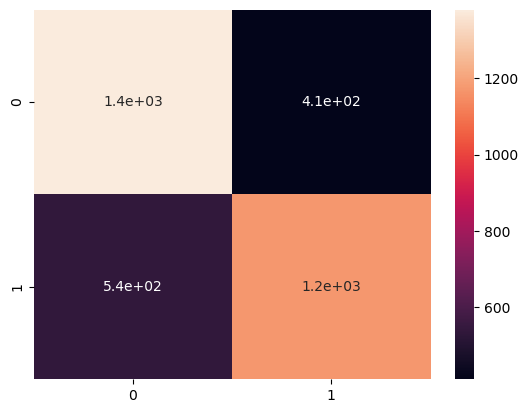

In [130]:
# plot confusion matrix

from sklearn.metrics import confusion_matrix
cm = confusion_matrix(y_test, predicted_values)
plt.figure()
sns.heatmap(cm, annot=True)

**Observation:**
- After performing PCA and then feeding in compressed features, SageMaker XGBoost algorithm performs noticably better in all metrics of classification

In [131]:
# Delete the end-point

Xgboost_classifier.delete_endpoint()

INFO:sagemaker:Deleting endpoint configuration with name: sagemaker-xgboost-2023-07-31-19-36-20-995
INFO:sagemaker:Deleting endpoint with name: sagemaker-xgboost-2023-07-31-19-36-20-995


# Conclusion

In this Jupyter Notebook, we addressed the important task of detecting the presence or absence of cardiovascular disease in individuals based on various features related to their health and lifestyle. The dataset encompassed key attributes such as age, height, weight, gender, blood pressure readings, cholesterol level, glucose level, smoking habits, alcohol intake, physical activity, and the binary label indicating the presence or absence of cardiovascular disease.

## Local XGBoost Model Evaluation:
Initially, I trained and tested an XGBoost model in local mode, and the performance on the testing set was as follows:

- Precision: 0.7346628101689755
- Recall: 0.6903161207266485
- Accuracy: 0.7208571428571429

## Hyperparameter Tuning with GridSearch:
To further improve the model's performance, I performed grid search to optimize the hyperparameters. The tuned XGBoost model yielded enhanced evaluation scores:

- Precision: 0.7720334810438207
- Recall: 0.6728651122872265
- Accuracy: 0.7374285714285714

## Dimensionality Reduction using PCA (AWS SageMaker):
I explored dimensionality reduction techniques to streamline the feature space and improve model efficiency. Specifically, I employed Principal Component Analysis (PCA) using AWS SageMaker.

## XGBoost Model Training and Evaluation after Dimensionality Reduction (AWS SageMaker):
The XGBoost model was trained and evaluated on the data after applying PCA for dimensionality reduction. The results indicate the following evaluation scores:

- Precision: 0.7301205986533365
- Recall: 0.7281502107769195
- Accuracy: 0.7291428571428571

## Model Deployment and Testing:
Finally, I deployed the trained XGBoost model to make predictions on new data. The model exhibited favorable accuracy, precision, and recall, making it a valuable tool for detecting cardiovascular disease in individuals.

## Key Findings and Impact:
The developed XGBoost model, combined with dimensionality reduction using PCA, showcases the potential of machine learning in healthcare for accurate disease detection. Early identification of cardiovascular disease can lead to timely interventions and personalized treatment plans, positively impacting patient outcomes and reducing healthcare costs.

## Future Directions:
To further enhance the model's performance, I can explore additional feature engineering techniques and consider more advanced machine learning algorithms. Additionally, incorporating more data from diverse sources and increasing the dataset size can lead to more robust models with even higher accuracy.

In conclusion, this comprehensive data science project highlights the significance of predictive modeling and dimensionality reduction in healthcare applications. By leveraging advanced machine learning techniques, medical professionals can make informed decisions and improve healthcare outcomes for individuals, contributing to a healthier and more sustainable future.
